![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

Este material tem como objetivo incentivar a prática dos conteúdos estudados até o momento, e a pesquisa. Tenha em consideração que o exercício foi pensado para incentivar a prática dos conteúdos estudados até então, porém aprender a pesquisar faz parte do processo de aprendizagem.

Fique tranquilo, faça os exercícios com calma, e boa prática!


#Orientações:

 - Faça uma copia deste arquivo
 - Após concluir os exercicios, suba seu exercicio para o GitHub e compartilhe o link no **google** Classroom


#Exercícios pandas e plot

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte [link.](https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv)

Os campos são:
- Rank: posição no ranking de vendas
- Name: nome do jogo
- Platform: plataforma/console
- Year: ano de lançamento
- Genre: gênero
- Publisher: empresa que publicou o jogo
- NA_Sales: vendas na américa do norte (em milhões de dólares)
- EU_Sales: vendas na europa (em milhões de dólares)
- JP_Sales: vendas no japão (em milhões de dólares)
- Other_Sales: outras vendas (em milhões de dólares)
- Global_Sales: vendas globais (em milhões de dólares)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
vgsales_df = pd.read_csv('vgsales.csv')

In [13]:
vgsales_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales;
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31;
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76;
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15;
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05;
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77;
5,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49;
6,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34;
7,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27;
8,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24;
9,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05,4.5;


In [38]:
# Exibir os nomes das colunas
print(vgsales_df.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales;'],
      dtype='object')


In [39]:
# Renomear a coluna, se necessário
vgsales_df.rename(columns={'Global_Sales;': 'Global_Sales'}, inplace=True)

# Confirmar os novos nomes das colunas
print(vgsales_df.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


Qual foi o jogo mais vendido no mundo em 2010?



In [41]:
jogo_2010 = vgsales_df[vgsales_df['Year'] == 2010]
jogo_mais_vendido_2010 = jogo_2010.loc[jogo_2010['Global_Sales'].idxmax()]
print(f"O jogo mais vendido no mundo em 2010 foi {jogo_mais_vendido_2010['Name']} com {jogo_mais_vendido_2010['Global_Sales']} milhões de cópias vendidas.")

O jogo mais vendido no mundo em 2010 foi Chaos;Head - Love Chu*Chu! com 0.03 milhões de cópias vendidas.


Qual foi a empresa que mais vendeu de 2005 até 2016 - Construa um gráfico de barras para apresentar


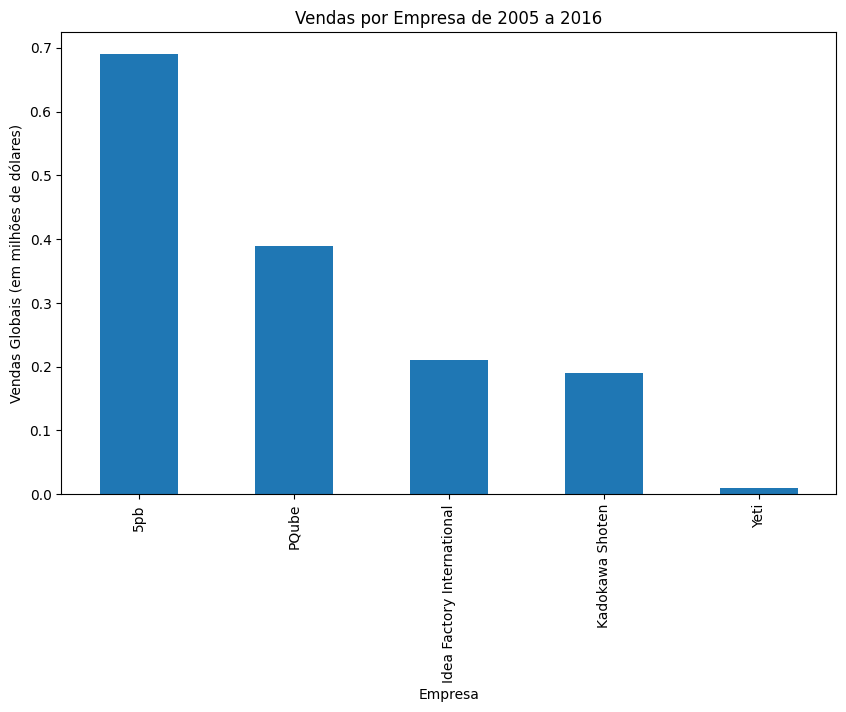

In [49]:
vendas_por_empresa = vgsales_df[(vgsales_df['Year'] >= 2005) & (vgsales_df['Year'] <= 2016)].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

top_10_empresas = vendas_por_empresa.head(5)

plt.figure(figsize=(10, 6))
top_10_empresas.plot(kind='bar')

plt.title('Vendas por Empresa de 2005 a 2016')
plt.xlabel('Empresa')
plt.ylabel('Vendas Globais (em milhões de dólares)')

plt.show()

Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.


In [154]:
sports_2008 = vgsales_df[(vgsales_df['Year'] == 2008) & (vgsales_df['Genre'] == 'Sports')]
menos_vendido_sports_2008 = sports_2008.loc[sports_2008['Global_Sales'].idxmin()]
print(f"O jogo de esport menos vendido em 2008 foi {menos_vendido_sports_2008['Name']}")

KeyError: nan

In [156]:
# Verificar se sports_2008 está vazio
if sports_2008.empty:
    print("Não há jogos de esportes em 2008.")
else:
    # Verificar se a coluna Global_Sales não contém apenas NaN
    if sports_2008['Global_Sales'].notna().any():
        menos_vendido_sports_2008 = sports_2008.loc[sports_2008['Global_Sales'].idxmin()]
        print(f"O jogo de esporte menos vendido em 2008 foi {menos_vendido_sports_2008['Name']}")
    else:
        print("Não há dados de vendas globais para jogos de esportes em 2008.")

Não há dados de vendas globais para jogos de esportes em 2008.


Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?





In [152]:
wii_games_2006_2010 = vgsales_df[(vgsales_df['Platform'] == 'Wii') & (vgsales_df['Year'] >= 2006) & (vgsales_df['Year'] <= 2010)]

wii_other_sales = wii_games_2006_2010['Other_Sales'].sum()
wii_global_sales = wii_games_2006_2010['Global_Sales'].sum()

percentual_other_sales = (wii_other_sales / wii_global_sales) * 100

print(f"Percentual de vendas globais de jogos de Wii em outras regiões (2006-2010): {percentual_other_sales}")

Percentual de vendas globais de jogos de Wii em outras regiões (2006-2010): inf


<ipython-input-152-746e1eae4c70>:6: RuntimeWarning: divide by zero encountered in scalar divide
  percentual_other_sales = (wii_other_sales / wii_global_sales) * 100


In [78]:
print(wii_games_2006_2010[['Year', 'Global_Sales']])

         Year  Global_Sales
6112   2006.0           NaN
6114   2006.0           NaN
6116   2006.0           NaN
6133   2006.0           NaN
6143   2006.0           NaN
...       ...           ...
12389  2010.0           NaN
12417  2010.0           NaN
12423  2010.0           NaN
12431  2010.0           NaN
12437  2010.0           NaN

[1086 rows x 2 columns]


Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.


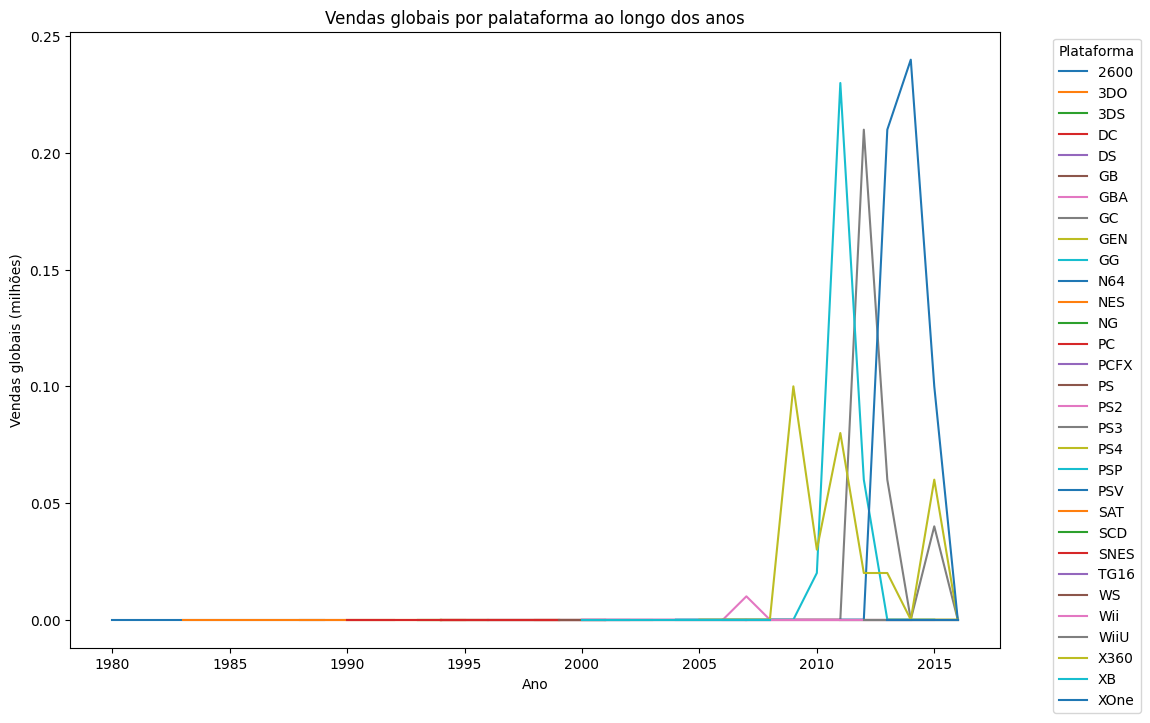

In [85]:
vendas_plataformas = vgsales_df.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack()

vendas_plataformas.plot(kind='line', figsize=(12, 8))
plt.title('Vendas globais por palataforma ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Vendas globais (milhões)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.




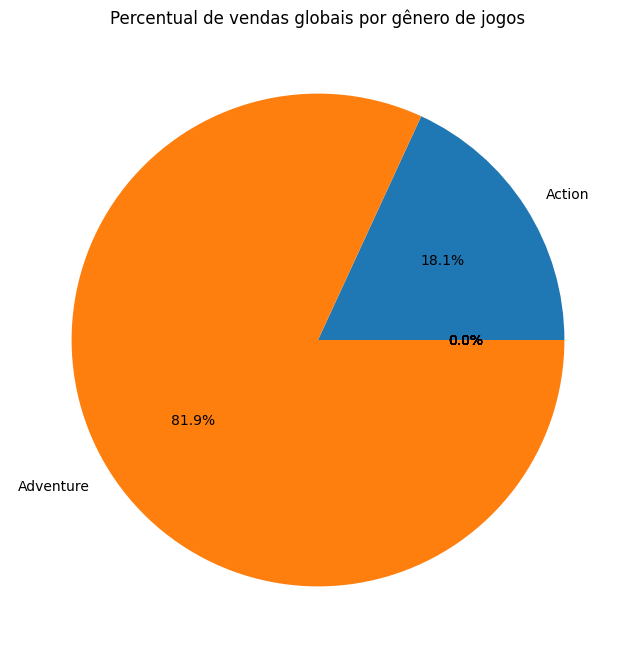

In [95]:
vendas_generos_jogos = vgsales_df.groupby('Genre')['Global_Sales'].sum()

vendas_generos_jogos.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 8))
plt.title('Percentual de vendas globais por gênero de jogos')
plt.ylabel('')
plt.show()

#Exercícios_pandas

Utilize os arquivos [livros.csv](https://drive.google.com/file/d/1fzuUyFxhzhE9U4_-i3IIUTwvgr3QG1Hj/view?usp=sharing), [livros_genero.csv](https://drive.google.com/file/d/1Cww5lAb7l_LQXVhH1ieyIOWIrqorNKcn/view?usp=sharing) e [livros_classicos.csv](https://drive.google.com/file/d/1pbSReiGSIIlHHXbFBOAaA5zTlNTrbY9P/view?usp=sharing) como entrada para o processamento requerido nos seguintes exercícios.


In [4]:
livros_df = pd.read_csv('livros.csv')
livros_genero_df = pd.read_csv('livros_genero.csv')
livros_classicos_df = pd.read_csv('livros_classicos.csv')

In [5]:
livros_df.head(12)

,nome,paginas
0,livro 1,257
1,livro 2,106
2,livro 3,150
3,livro 4,175
4,livro 5,321
5,livro 6,159
6,livro 7,980
7,livro 8,235
8,livro 9,745
9,livro 10,126


In [6]:
livros_genero_df.head(12)

,genero,autor
0,Drama,Pedro
1,Aventura,José
2,Drama,Carlos
3,Romance,Maria
4,Romance,Fabio
5,Aventura,Aline
6,Drama,Paulo
7,Aventura,Sandro
8,Romance,Maria
9,Aventura,Fabio


In [7]:
livros_classicos_df.head(12)

,nome,autor
0,livro 1,Jorge
1,livro 2,Santos
2,livro 3,Leandro
3,livro 4,Clara
4,livro 5,Flavia
5,livro 6,Leandro
6,livro 7,Santos
7,livro 8,Marcia
8,livro 9,Marcia
9,livro 10,Clara


Faça a concatenação das bases de dados livros.csv e livros_genero.csv e encontre qual o gênero de livro correspondente a cada livro.

In [8]:
livros_concatenados = pd.concat([livros_df, livros_genero_df], axis=1)
print(livros_concatenados)

        nome  paginas    genero   autor
0    livro 1    257.0     Drama   Pedro
1    livro 2    106.0  Aventura    José
2    livro 3    150.0     Drama  Carlos
3    livro 4    175.0   Romance   Maria
4    livro 5    321.0   Romance   Fabio
5    livro 6    159.0  Aventura   Aline
6    livro 7    980.0     Drama   Paulo
7    livro 8    235.0  Aventura  Sandro
8    livro 9    745.0   Romance   Maria
9   livro 10    126.0  Aventura   Fabio
10       NaN      NaN   Romance   Pedro


In [9]:
livros_concatenados.columns

Index(['nome', 'paginas', 'genero', 'autor'], dtype='object')

Faça a concatenação das bases de dados de livros e livros_genero e encontre qual os gêneros e os autores que não possuem um livro correspondente.

In [10]:
generos_sem_livros = livros_genero_df[~livros_genero_df['genero'].isin(livros_df['nome'])]['genero'].unique()
autores_sem_livros = livros_genero_df[~livros_genero_df['autor'].isin(livros_df['nome'])]['autor'].unique()

print(f"Gêneros sem livros correspondentes:\n{generos_sem_livros}")
print(f"Autores sem livros correspondentes:\n{autores_sem_livros}")

Gêneros sem livros correspondentes:
['Drama' 'Aventura' 'Romance']
Autores sem livros correspondentes:
['Pedro' 'José' 'Carlos' 'Maria' 'Fabio' 'Aline' 'Paulo' 'Sandro']


Faça a junção das bases de livros e livros clássicos.

In [11]:
livros_juntos = pd.concat([livros_df, livros_classicos_df], axis=1)
print(livros_juntos)

       nome  paginas      nome    autor
0   livro 1      257   livro 1    Jorge
1   livro 2      106   livro 2   Santos
2   livro 3      150   livro 3  Leandro
3   livro 4      175   livro 4    Clara
4   livro 5      321   livro 5   Flavia
5   livro 6      159   livro 6  Leandro
6   livro 7      980   livro 7   Santos
7   livro 8      235   livro 8   Marcia
8   livro 9      745   livro 9   Marcia
9  livro 10      126  livro 10    Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos em comum entre ambos e remova os índices dos antigos dataframes.

In [13]:
# Encontrando os índices dos elementos em comum
indices_em_comum = livros_df[livros_df['nome'].isin(livros_classicos_df['nome'])].index

# Selecionando apenas os elementos em comum para concatenar
livros_juntos = pd.concat([livros_df.loc[indices_em_comum], livros_classicos_df.loc[indices_em_comum]['autor']], axis=1)

# Removendo os índices originais dos DataFrames
livros_juntos.reset_index(drop=True, inplace=True)

print(livros_juntos)

       nome  paginas    autor
0   livro 1      257    Jorge
1   livro 2      106   Santos
2   livro 3      150  Leandro
3   livro 4      175    Clara
4   livro 5      321   Flavia
5   livro 6      159  Leandro
6   livro 7      980   Santos
7   livro 8      235   Marcia
8   livro 9      745   Marcia
9  livro 10      126    Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos.

In [16]:
# Filtrando apenas os elementos em comum
comum_nomes = set(livros_df['nome']).intersection(set(livros_classicos_df['nome']))

# Filtrando os DataFrames originais
livros_df_comum = livros_df[livros_df['nome'].isin(comum_nomes)].copy()
livros_classicos_df_comum = livros_classicos_df[livros_classicos_df['nome'].isin(comum_nomes)].copy()

# Adicionando a chave de origem
livros_df_comum['chave'] = 'livros_df'
livros_classicos_df_comum['chave'] = 'livros_classicos_df'

# Concatenando os DataFrames
livros_juntos = pd.concat([livros_df_comum, livros_classicos_df_comum], ignore_index=True)

# Resetando os índices
livros_juntos.reset_index(drop=True, inplace=True)

print(livros_juntos)

        nome  paginas                chave    autor
0    livro 1    257.0            livros_df      NaN
1    livro 2    106.0            livros_df      NaN
2    livro 3    150.0            livros_df      NaN
3    livro 4    175.0            livros_df      NaN
4    livro 5    321.0            livros_df      NaN
5    livro 6    159.0            livros_df      NaN
6    livro 7    980.0            livros_df      NaN
7    livro 8    235.0            livros_df      NaN
8    livro 9    745.0            livros_df      NaN
9   livro 10    126.0            livros_df      NaN
10   livro 1      NaN  livros_classicos_df    Jorge
11   livro 2      NaN  livros_classicos_df   Santos
12   livro 3      NaN  livros_classicos_df  Leandro
13   livro 4      NaN  livros_classicos_df    Clara
14   livro 5      NaN  livros_classicos_df   Flavia
15   livro 6      NaN  livros_classicos_df  Leandro
16   livro 7      NaN  livros_classicos_df   Santos
17   livro 8      NaN  livros_classicos_df   Marcia
18   livro 9

Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos, além de nomes para os índices.

In [26]:
comum_nomes = set(livros_df['nome']).intersection(set(livros_classicos_df['nome']))

livros_df_comum = livros_df[livros_df['nome'].isin(comum_nomes)].copy()
livros_classicos_df_comum = livros_classicos_df[livros_classicos_df['nome'].isin(comum_nomes)].copy()

livros_df_comum['chave'] = 'livros_df'
livros_classicos_df_comum['chave'] = 'livros_classicos_df'

# Adicionando nomes para os índices
livros_df_comum.index.name = 'indice_livros'
livros_classicos_df_comum.index.name = 'indice_classicos'

livros_juntos = pd.concat([livros_df_comum, livros_classicos_df_comum], ignore_index=True)

# Resetando os índices e adicionando um nome para o índice final
livros_juntos.reset_index(drop=True, inplace=True)
livros_juntos.index.name = 'indice'

print(livros_juntos)

            nome  paginas                chave    autor
indice                                                 
0        livro 1    257.0            livros_df      NaN
1        livro 2    106.0            livros_df      NaN
2        livro 3    150.0            livros_df      NaN
3        livro 4    175.0            livros_df      NaN
4        livro 5    321.0            livros_df      NaN
5        livro 6    159.0            livros_df      NaN
6        livro 7    980.0            livros_df      NaN
7        livro 8    235.0            livros_df      NaN
8        livro 9    745.0            livros_df      NaN
9       livro 10    126.0            livros_df      NaN
10       livro 1      NaN  livros_classicos_df    Jorge
11       livro 2      NaN  livros_classicos_df   Santos
12       livro 3      NaN  livros_classicos_df  Leandro
13       livro 4      NaN  livros_classicos_df    Clara
14       livro 5      NaN  livros_classicos_df   Flavia
15       livro 6      NaN  livros_classicos_df  

Faça a junção das bases de dados livros e livros_classicos e verifique a integridade do dataframe resultante.

In [29]:
comum_nomes = set(livros_df['nome']).intersection(set(livros_classicos_df['nome']))

livros_df_comum = livros_df[livros_df['nome'].isin(comum_nomes)].copy()
livros_classicos_df_comum = livros_classicos_df[livros_classicos_df['nome'].isin(comum_nomes)].copy()

livros_df_comum['chave'] = 'livros_df'
livros_classicos_df_comum['chave'] = 'livros_classicos_df'

livros_df_comum.index.name = 'indice_livros'
livros_classicos_df_comum.index.name = 'indice_classicos'

livros_juntos = pd.concat([livros_df_comum, livros_classicos_df_comum], ignore_index=True)

livros_juntos.reset_index(drop=True, inplace=True)
livros_juntos.index.name = 'indice'

# Verificando a integridade do DataFrame resultante
# Vamos verificar se todos os nomes comuns estão presentes no DataFrame resultante
comum_nomes_df = set(livros_juntos['nome'])
integridade = comum_nomes == comum_nomes_df

print(f"DataFrame resultante:\n {livros_juntos}")
print(f"\nIntegridade verificada: {integridade}")

DataFrame resultante:
             nome  paginas                chave    autor
indice                                                 
0        livro 1    257.0            livros_df      NaN
1        livro 2    106.0            livros_df      NaN
2        livro 3    150.0            livros_df      NaN
3        livro 4    175.0            livros_df      NaN
4        livro 5    321.0            livros_df      NaN
5        livro 6    159.0            livros_df      NaN
6        livro 7    980.0            livros_df      NaN
7        livro 8    235.0            livros_df      NaN
8        livro 9    745.0            livros_df      NaN
9       livro 10    126.0            livros_df      NaN
10       livro 1      NaN  livros_classicos_df    Jorge
11       livro 2      NaN  livros_classicos_df   Santos
12       livro 3      NaN  livros_classicos_df  Leandro
13       livro 4      NaN  livros_classicos_df    Clara
14       livro 5      NaN  livros_classicos_df   Flavia
15       livro 6      NaN